In [1]:
# Libraries for data loading, data manipulation and data visulisation
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import plotly.express as px
import wordcloud
from collections import Counter
from wordcloud import WordCloud
from wordcloud import  WordCloud, STOPWORDS, ImageColorGenerator
from PIL import Image

# Libraries for data preparation and model building
import nltk
from nltk.corpus import stopwords
nltk.download('stopwords')
from nltk.tokenize import word_tokenize 
nltk.download('punkt')
from string import punctuation

# Libraries from Sklearn
from sklearn.model_selection import GridSearchCV
from sklearn import svm
from sklearn.svm import LinearSVC
from sklearn.naive_bayes import BernoulliNB
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.feature_extraction.text import CountVectorizer 
    
from sklearn.utils import resample

import warnings
warnings.filterwarnings('ignore')


[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\MIRI\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\MIRI\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


### Loading the Data

In [2]:
df_train = pd.read_csv('train_set.csv')
df_test = pd.read_csv('test_set.csv')

In [3]:
#overview dataset
print(f' There are {df_train.shape[0]} rows and {df_train.shape[1]} columns in train set')
df_train.head(3)

 There are 33000 rows and 2 columns in train set


,lang_id,text
0,xho,umgaqo-siseko wenza amalungiselelo kumaziko ax...
1,xho,i-dha iya kuba nobulumko bokubeka umsebenzi na...
2,eng,the province of kwazulu-natal department of tr...


In [4]:
#overview dataset
print(f' There are {df_test.shape[0]} rows and {df_test.shape[1]} columns in test set')
df_test.head(3)

 There are 5682 rows and 2 columns in test set


,index,text
0,1,"Mmasepala, fa maemo a a kgethegileng a letlele..."
1,2,Uzakwaziswa ngokufaneleko nakungafuneka eminye...
2,3,Tshivhumbeo tshi fana na ngano dza vhathu.


## Exploratory Data Analysis (EDA)

### lets explain our data
Our training Data contains 3 features, namely:

1. lang_id (dependent variable)

2. text

#### Data Information

In [5]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 33000 entries, 0 to 32999
Data columns (total 2 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   lang_id  33000 non-null  object
 1   text     33000 non-null  object
dtypes: object(2)
memory usage: 515.8+ KB


all columns contain text data and so we will need to encode both variables during feature engineering

In [6]:
#check if there are null values in our data
df_train.isnull().sum()

lang_id    0
text       0
dtype: int64

we have no missing values in our train set

lets check the shape of the train set

In [7]:
df_train.shape

(33000, 2)

From the data, we have a total of 33000 observations and 2 columns

Let us Print off a list of all the language types present in the dataset

In [8]:
type_languages = list(df_train.lang_id.unique())
print(type_languages)
print('we have ' + str(len(type_languages)) + " language types in the data set")

['xho', 'eng', 'nso', 'ven', 'tsn', 'nbl', 'zul', 'ssw', 'tso', 'sot', 'afr']
we have 11 language types in the data set


Let's have a look at how many data samples we have for each of the different language types.

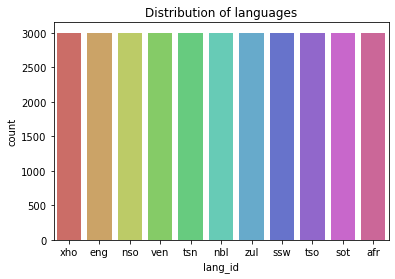

In [9]:
sns.countplot(x = 'lang_id', data = df_train, palette="hls")
plt.title("Distribution of languages");

looks like we have an even distribution of each language in the data set.

Let us check the percentage of these classes to understand comfirm.

we have the percentage for categorical columns as: 
xho    9.090909
eng    9.090909
nso    9.090909
ven    9.090909
tsn    9.090909
nbl    9.090909
zul    9.090909
ssw    9.090909
tso    9.090909
sot    9.090909
afr    9.090909
Name: lang_id, dtype: float64


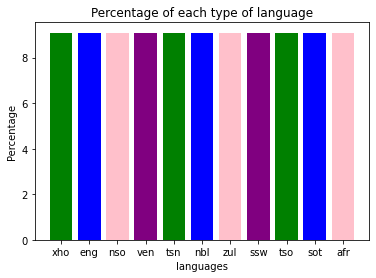

In [10]:
## Check the Percentage of the distribution in our data 
print("we have the percentage for categorical columns as: ")
d = df_train['lang_id'].value_counts(normalize = True) * 100 # series
print(d)

## plot for analysis
labels = df_train['lang_id'].unique()
plt.bar(x = d.index, height = d.values, label = d.index, color= ['green','blue','pink','purple'])
plt.xlabel("languages")
plt.xticks(labels)
plt.ylabel("Percentage")
plt.title("Percentage of each type of language")
plt.show()

From the observations seen in both visualizations, we can conclude that:

The language types are unevenly distributed

No need to resample the data set in the Preprocessing Chapter of our notebook

#### Next we will carry out a visualisation of the most common words in our data for 3 languages using wordcloud

In [11]:
type_languages

['xho', 'eng', 'nso', 'ven', 'tsn', 'nbl', 'zul', 'ssw', 'tso', 'sot', 'afr']

In [88]:
# Classify each languages into categories
isiXhosa = df_train[df_train['lang_id']== 'xho']
english = df_train[df_train['lang_id']== 'eng']
Sepedi = df_train[df_train['lang_id']== 'nso']
Tshivenda = df_train[df_train['lang_id']== 'ven']
Setswana = df_train[df_train['lang_id']== 'tsn']
isiNdebele = df_train[df_train['lang_id']== 'nbl']
isiZulu = df_train[df_train['lang_id']== 'zul']
siSwati = df_train[df_train['lang_id']== 'ssw']
Xitsonga = df_train[df_train['lang_id']== 'tso']
Sesotho = df_train[df_train['lang_id']== 'sot']
Afrikaans = df_train[df_train['lang_id']== 'afr']

### wordcloud for isiXhosa

Text(0.5, 1.0, 'Word cloud for isiXhosa language')

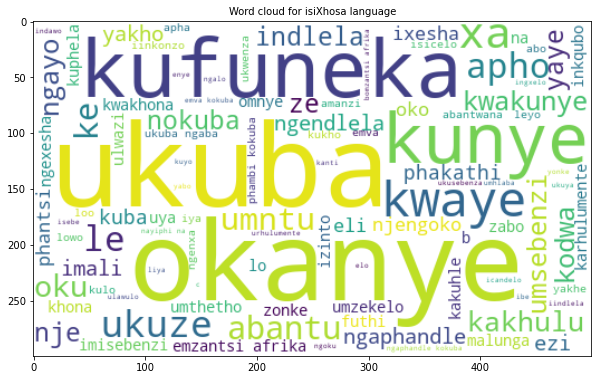

In [106]:
plt.figure(figsize = (10,15)) # Text that is Fake News Headlines
wc = WordCloud(max_words = 100 , background_color="white", width = 500 , height = 300).generate(" ".join(isiXhosa.text))
plt.imshow(wc , interpolation = 'bilinear')
plt.title('Word cloud for isiXhosa language',fontsize=10)

### word cloud for english

Text(0.5, 1.0, 'Word cloud for isiXhosa language')

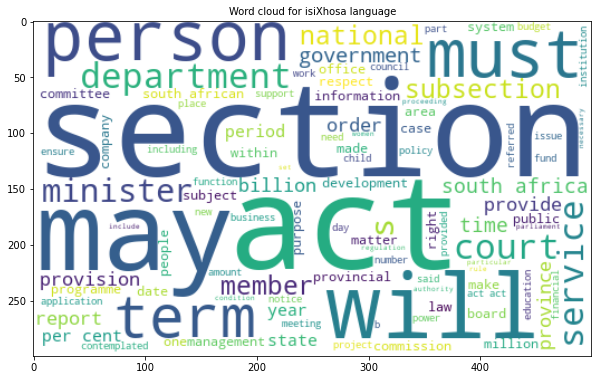

In [107]:
plt.figure(figsize = (10,15)) # Text that is Fake News Headlines
wc = WordCloud(max_words = 100 , background_color="white", width = 500 , height = 300).generate(" ".join(english.text))
plt.imshow(wc , interpolation = 'bilinear')
plt.title('Word cloud for isiXhosa language',fontsize=10)

### wordcloud for Sepedi

Text(0.5, 1.0, 'Word cloud for isiXhosa language')

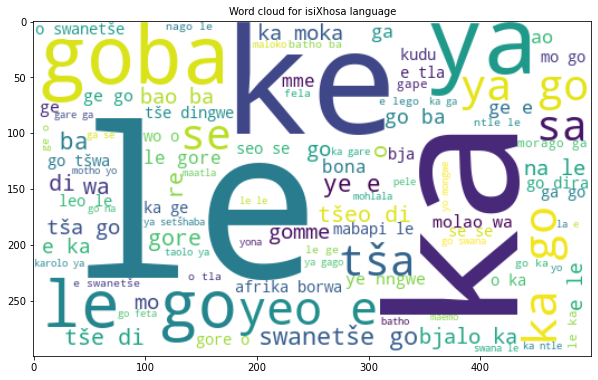

In [108]:
plt.figure(figsize = (10,15)) # Text that is Fake News Headlines
wc = WordCloud(max_words = 100 , background_color="white", width = 500 , height = 300).generate(" ".join(Sepedi.text))
plt.imshow(wc , interpolation = 'bilinear')
plt.title('Word cloud for isiXhosa language',fontsize=10)

# Preprocessing

### Remove punctuation
First we make all the text lower case to remove some noise from capitalisation.

In [16]:
df_train['text'] = df_train['text'].str.lower()

lets reapeat for test set

In [17]:
df_test['text'] = df_test['text'].str.lower()

lets remove punctuations using the string module

In [18]:
import string

we create a function to apply to the dataframe

In [19]:
def remove_punctuation(post):
    return ''.join([l for l in post if l not in string.punctuation])

In [20]:
df_train['text'] = df_train['text'].apply(remove_punctuation)
df_train['text'].iloc[268]

'ngokuhambisana nendlela esetshenziswayo njengamanje umthethiosivivinywa ubhekela ukuthi intela yendawo yemukelwe ngumasipala ngokulandela isinqumo somkhandlu nokuba imenyezelwe ngokusemthethweni ngesaziso esiyochonywa emahhovisi kamasipala emva kokumenyezelwa emithonjeni yezindaba'

In [21]:
df_test['text'] = df_test['text'].apply(remove_punctuation)
df_test['text'].iloc[268]

'ababili abawine impelasonto yokuqala yababili ifaka nokundiza ukuqasha umklomelo 1 imoto indawo yokuhlala nokudla esifundazweni ozikhethele sona'

In [22]:
df_train.head()

,lang_id,text
0,xho,umgaqosiseko wenza amalungiselelo kumaziko axh...
1,xho,idha iya kuba nobulumko bokubeka umsebenzi nap...
2,eng,the province of kwazulunatal department of tra...
3,nso,o netefatša gore o ba file dilo ka moka tše le...
4,ven,khomishini ya ndinganyiso ya mbeu yo ewa maana...


In [23]:
df_test.head()

,index,text
0,1,mmasepala fa maemo a a kgethegileng a letlelel...
1,2,uzakwaziswa ngokufaneleko nakungafuneka eminye...
2,3,tshivhumbeo tshi fana na ngano dza vhathu
3,4,kube inja nelikati betingevakala kutsi titsini...
4,5,winste op buitelandse valuta


In [31]:
df_train2 = df_train.copy()
df_train2.head()

,lang_id,text
0,xho,umgaqosiseko wenza amalungiselelo kumaziko axh...
1,xho,idha iya kuba nobulumko bokubeka umsebenzi nap...
2,eng,the province of kwazulunatal department of tra...
3,nso,o netefatša gore o ba file dilo ka moka tše le...
4,ven,khomishini ya ndinganyiso ya mbeu yo ewa maana...


In [32]:
df_test2 = df_test.copy()

In [33]:
df_test.head()

,index,text
0,1,mmasepala fa maemo a a kgethegileng a letlelel...
1,2,uzakwaziswa ngokufaneleko nakungafuneka eminye...
2,3,tshivhumbeo tshi fana na ngano dza vhathu
3,4,kube inja nelikati betingevakala kutsi titsini...
4,5,winste op buitelandse valuta


### Vectorizing train set
instantiate vectorizer

In [65]:
Vect = CountVectorizer(max_features = 1000)

In [66]:
X_vect =Vect.fit_transform(df_train2['text'])

In [67]:
X_vect.shape

(33000, 100)

### Vectorizing the test set

In [68]:
X_vect_testset = Vect.transform(df_test2['text'])

In [69]:
X_vect_testset.shape

(5682, 100)

### Encoding response variable

In [70]:
y = df_train2['lang_id']

In [71]:
np.unique(y)

array(['afr', 'eng', 'nbl', 'nso', 'sot', 'ssw', 'tsn', 'tso', 'ven',
       'xho', 'zul'], dtype=object)

In [72]:
#type_labels = list(le.classes_)

## Training the logistic regression model 

### Setting up the train_test_split

In [73]:
X_train, X_test, y_train, y_test = train_test_split(X_vect, y, test_size=0.2, random_state=27)

In [74]:
#Here 'ovr' indicates that we have selected our One-vs-Rest strategy. 
logreg = LogisticRegression(multi_class='ovr')

In [75]:
logreg.fit(X_train, y_train)

LogisticRegression(multi_class='ovr')

In [76]:
# Generate predictions
y_pred_test = logreg.predict(X_test)

In [77]:
# Classification report
from sklearn.metrics import classification_report
print(classification_report(y_test, y_pred_test))

import warnings
warnings.filterwarnings('ignore')

              precision    recall  f1-score   support

         afr       1.00      0.99      1.00       632
         eng       0.99      1.00      1.00       595
         nbl       0.47      0.86      0.61       607
         nso       0.98      0.96      0.97       573
         sot       0.99      0.99      0.99       572
         ssw       0.96      0.54      0.69       647
         tsn       0.95      0.98      0.97       568
         tso       1.00      1.00      1.00       576
         ven       1.00      1.00      1.00       601
         xho       0.92      0.60      0.73       598
         zul       0.72      0.70      0.71       631

    accuracy                           0.87      6600
   macro avg       0.91      0.88      0.88      6600
weighted avg       0.91      0.87      0.87      6600



### Predict for test set

In [54]:
y_pred_testset = logreg.predict(X_vect_testset)

In [55]:
#The following codes are used to save the expected predictions for kaggle submission
kag_sub = df_test2[['index']]
kag_sub['lang_id']= y_pred_testset
kag_sub.to_csv('logisticreg1.csv', index = None)

## SVM

In [80]:
from sklearn.svm import SVC
from sklearn.metrics import classification_report, accuracy_score

svc = SVC(kernel='rbf')
svc.fit(X_train, y_train)
y_pred = svc.predict(X_test)

print("The accuracy score of the SVC is:", accuracy_score(y_test, y_pred))
print("\n\nClassification Report:\n\n",classification_report(y_test, y_pred))

The accuracy score of the SVC is: 0.8660606060606061


Classification Report:

               precision    recall  f1-score   support

         afr       1.00      1.00      1.00       632
         eng       0.99      1.00      0.99       595
         nbl       0.45      0.91      0.60       607
         nso       0.97      0.95      0.96       573
         sot       0.99      0.99      0.99       572
         ssw       0.85      0.62      0.72       647
         tsn       0.95      0.97      0.96       568
         tso       1.00      1.00      1.00       576
         ven       1.00      1.00      1.00       601
         xho       0.92      0.60      0.73       598
         zul       0.88      0.55      0.67       631

    accuracy                           0.87      6600
   macro avg       0.91      0.87      0.87      6600
weighted avg       0.91      0.87      0.87      6600



In [81]:
y_predrbf = svc.predict(X_vect_testset)

In [82]:
#The following codes are used to save the expected predictions for kaggle submission
kag_subrbf = df_test2[['index']]
kag_subrbf['lang_id']= y_predrbf
kag_subrbf.to_csv('supportvectorrbf.csv', index = None)

## SVM linear

In [83]:
svcl = SVC(kernel='linear')
svcl.fit(X_train, y_train)
y_predlinear = svcl.predict(X_test)

print("The accuracy score of the SVC is:", accuracy_score(y_test, y_predlinear))
print("\n\nClassification Report:\n\n",classification_report(y_test, y_predlinear))

The accuracy score of the SVC is: 0.8715151515151515


Classification Report:

               precision    recall  f1-score   support

         afr       1.00      1.00      1.00       632
         eng       0.99      1.00      0.99       595
         nbl       0.48      0.85      0.61       607
         nso       0.99      0.96      0.97       573
         sot       0.98      1.00      0.99       572
         ssw       0.74      0.69      0.72       647
         tsn       0.97      0.98      0.97       568
         tso       1.00      1.00      1.00       576
         ven       1.00      1.00      1.00       601
         xho       0.92      0.61      0.73       598
         zul       0.88      0.56      0.68       631

    accuracy                           0.87      6600
   macro avg       0.90      0.88      0.88      6600
weighted avg       0.90      0.87      0.87      6600



In [84]:
y_predlinear = svcl.predict(X_vect_testset)

In [85]:
#The following codes are used to save the expected predictions for kaggle submission
kag_sublinear = df_test2[['index']]
kag_sublinear['lang_id']=y_predlinear
kag_sublinear.to_csv('supportvectorlinear.csv', index = None)

## Random Forrest Classifier

In [243]:
from sklearn.ensemble import RandomForestClassifier

In [244]:
forest = RandomForestClassifier(n_estimators=150, random_state=42)
forest.fit(X_train, y_train)

RandomForestClassifier(n_estimators=150, random_state=42)

In [245]:
pred_forest = forest.predict(X_test)
print(classification_report(y_test, pred_forest))

              precision    recall  f1-score   support

         afr       1.00      1.00      1.00       632
         eng       0.99      1.00      0.99       595
         nbl       0.98      0.95      0.96       607
         nso       1.00      0.99      1.00       573
         sot       1.00      1.00      1.00       572
         ssw       0.99      0.96      0.97       647
         tsn       0.99      1.00      1.00       568
         tso       1.00      1.00      1.00       576
         ven       1.00      1.00      1.00       601
         xho       0.97      0.98      0.97       598
         zul       0.92      0.96      0.94       631

    accuracy                           0.98      6600
   macro avg       0.99      0.99      0.99      6600
weighted avg       0.98      0.98      0.98      6600



In [248]:
pred_foresttest = forest.predict(X_vect_testset)

In [249]:
#The following codes are used to save the expected predictions for kaggle submission
kagfor_sub = df_test2[['index']]
kagfor_sub['lang_id']= y_pred_testset
kagfor_sub.to_csv('Randomforrest.csv', index = None)